# Part A

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Car name.csv')
df2=pd.read_json('Car-Attributes.json')
cars=pd.merge(df1,df2,left_index=True,right_index=True)
cars.shape

(398, 9)

In [3]:
temp = pd.DataFrame(cars.hp.str.isdigit()) 
temp[temp['hp'] == False]

hp
32   False
126  False
330  False
336  False
354  False
374  False

In [4]:
cars['hp'][32]

'?'

In [5]:
cars['hp'][126]

'?'

In [6]:
cars['hp'][330]

'?'

In [7]:
cars['hp'][336]

'?'

In [8]:
cars['hp'][354]

'?'

In [9]:
cars['hp'][374]

'?'

In [10]:
cars = cars.replace('?', np.nan)
cars.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  392.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.469388  2970.424623   
std      7.815984    1.701004  104.269838   38.491160   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   75.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  126.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

All the independent variables are distributed normally except displacement, horsepower and weight which show a right-skewed distribution. It seems like there may not be too many outliers.

In [11]:
cars.isna().mean().round(4)*100

car_name    0.00
mpg         0.00
cyl         0.00
disp        0.00
hp          1.51
wt          0.00
acc         0.00
yr          0.00
origin      0.00
dtype: float64

In [12]:
cars=cars.replace(np.nan,cars.hp.median())
cars.hp.isna().mean()

0.0

In [13]:
duplicates=cars[cars.duplicated(keep='last')]
print(duplicates)

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


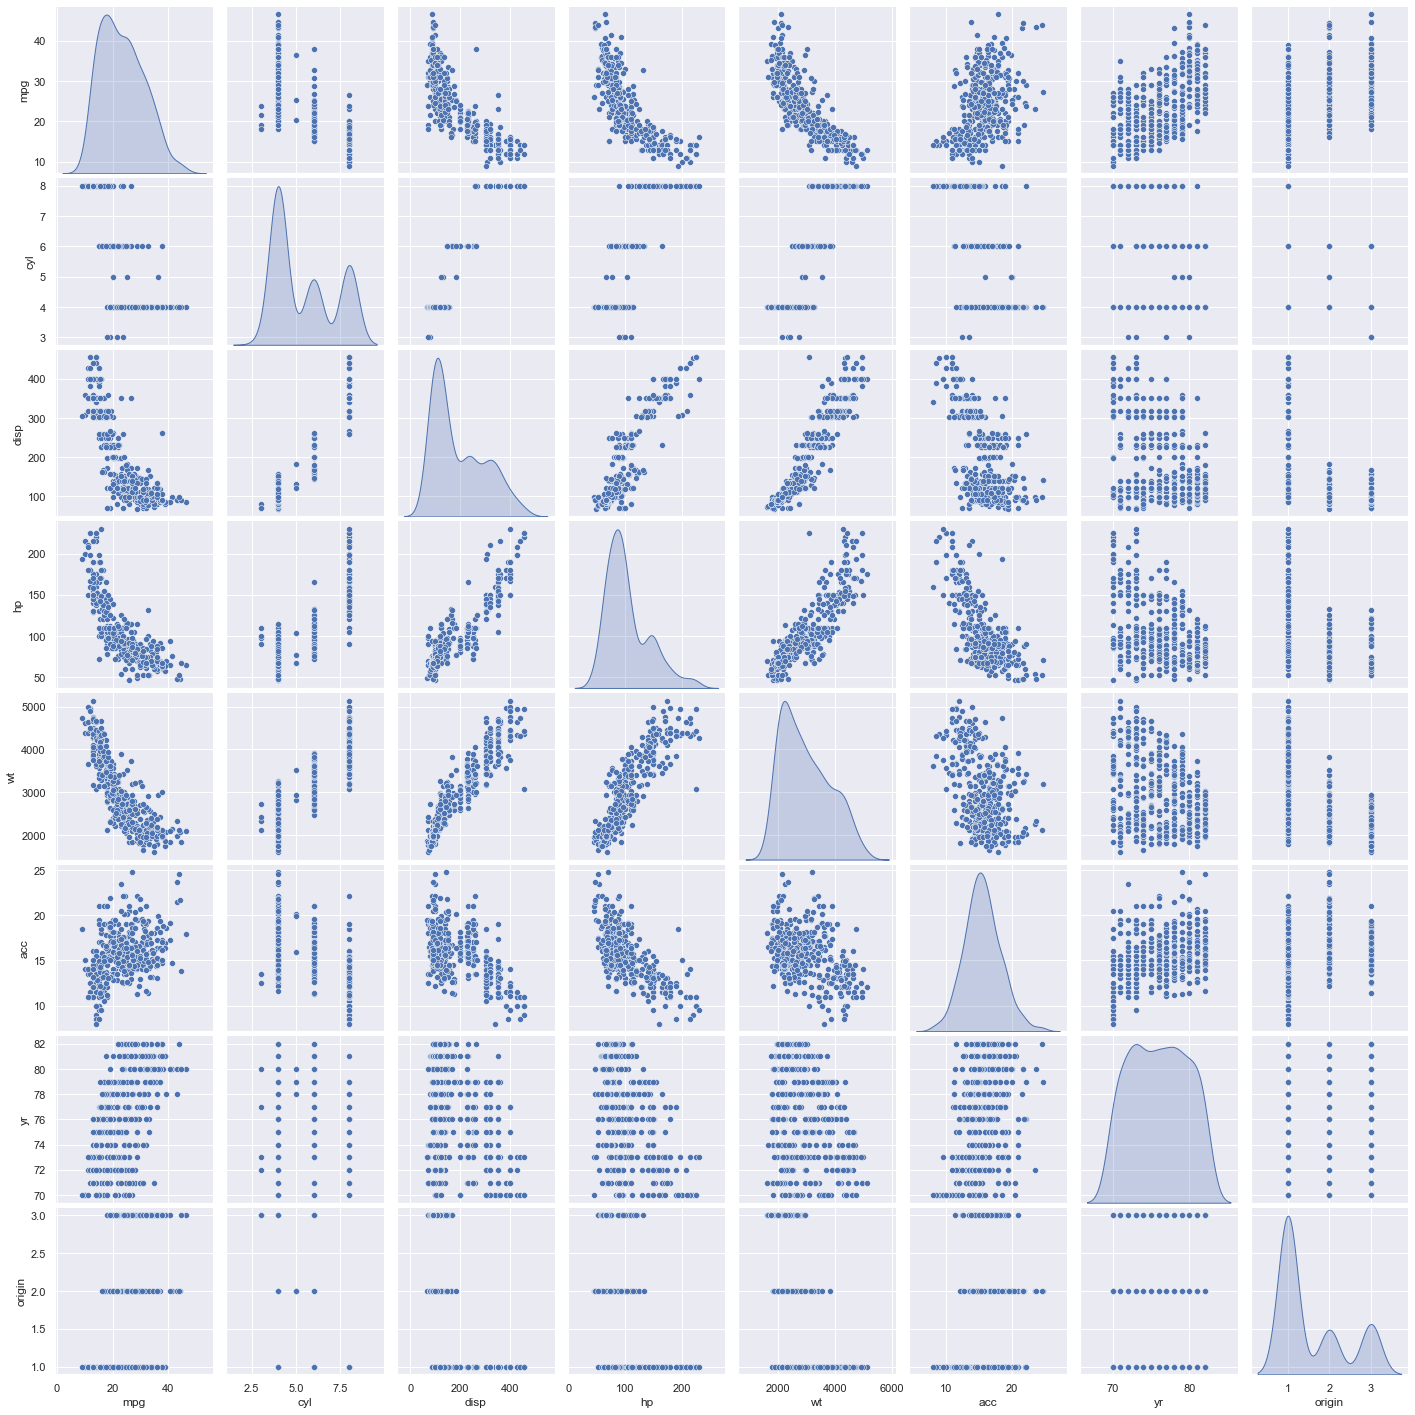

In [14]:
cols=cars.iloc[:,1:]
sns.pairplot(cols,diag_kind='kde');

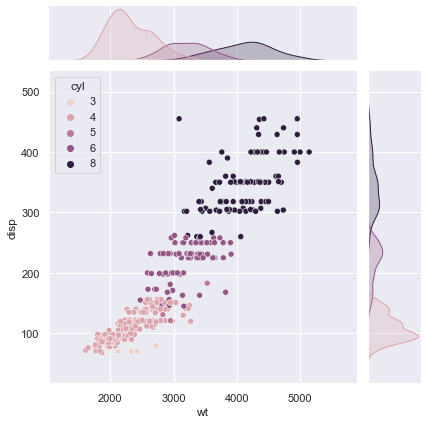

In [15]:
sns.jointplot(x=cars['wt'],y=cars['disp'],hue=cars['cyl']);

The wt and disp columns are positively correlated to each other. The number of cylinders is also positively correlated with weight and displacement. 

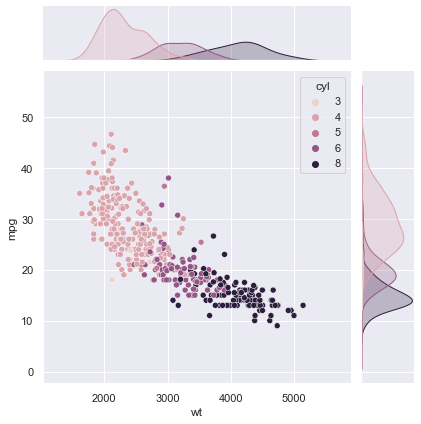

In [16]:
sns.jointplot(x=cars['wt'],y=cars['mpg'],hue=cars['cyl']);

The wt and mpg columns are negatively correlated to each other. The number of cylinders is positively correlated with weight and negatively correlated with miles per gallon. 

As shown above there are six datapoints in the hp column with unexpected values. They were all question mark symbols found in the rows 32, 126, 330, 336, 354, and 374.  

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


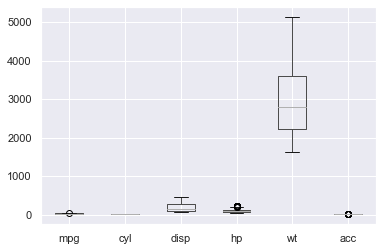

In [18]:
X=cars.drop(['yr','origin','car_name'], axis =1)
X.boxplot();

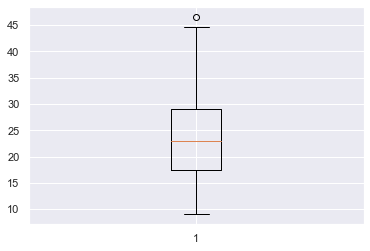

In [23]:
plt.boxplot(X['mpg']);

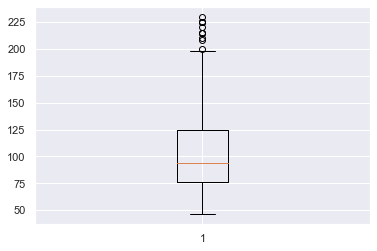

In [24]:
plt.boxplot(X['hp']);

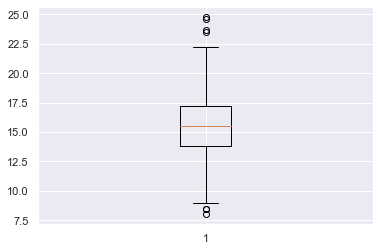

In [25]:
plt.boxplot(X['acc']);

In [26]:
X['hp'] = np.log(X['hp'])
X['acc'] = np.log(X['acc'])
X['mpg'] = np.log(X['mpg'])

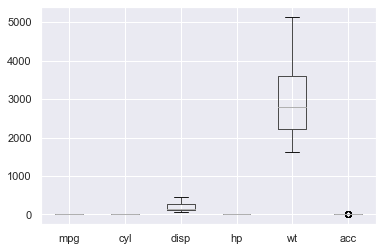

In [27]:
X.boxplot();

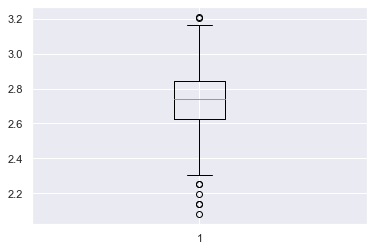

In [28]:
plt.boxplot(X['acc']);

In [29]:
X=X.apply(zscore)

In [31]:
cluster_range = range(2,11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 20)
    clusters.fit(X)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df

num_clusters  cluster_errors
0             2      913.081881
1             3      573.852311
2             4      466.901685
3             5      414.197665
4             6      364.255149
5             7      324.420287
6             8      296.265998
7             9      274.279526
8            10      257.748295

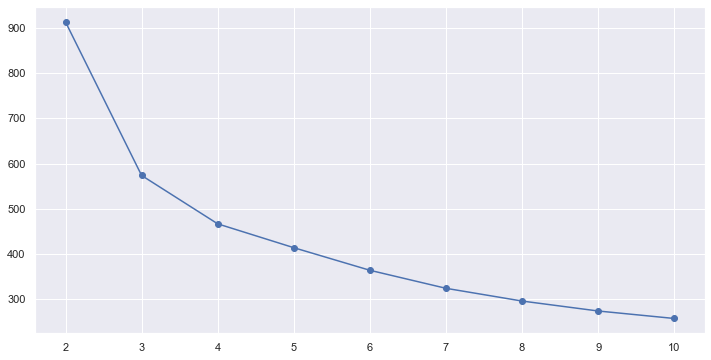

In [32]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [53]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(x=clusters_df.num_clusters, y=clusters_df.cluster_errors)
fig.add_trace(go.Scatter(x=[4], y=[466.901685], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig.show();

In [35]:
best = KMeans(n_clusters=4, n_init = 20, random_state=1)
best.fit(X)

KMeans(n_clusters=4, n_init=20, random_state=1)

In [54]:
predictions = best.predict(X)
cars["group"] = predictions
cars['group'] = cars['group'].astype('category')
cars.dtypes
cars.head(10)

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   
5           ford galaxie 500  15.0    8  429.0  198.0  4341  10.0  70       1   
6           chevrolet impala  14.0    8  454.0  220.0  4354   9.0  70       1   
7          plymouth fury iii  14.0    8  440.0  215.0  4312   8.5  70       1   
8           pontiac catalina  14.0    8  455.0  225.0  4425  10.0  70       1   
9         amc ambassador dpl  15.0    8  390.0  190.0  3850   8.5  70       1   

  group  
0     1  
1     1  
2     1  
3     1  
4     1  
5     1  
6     1  
7     1  
8     1  
9     1

C:\Users\vjanu\AppData\Local\Temp/ipykernel_23000/3196702069.py:8: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

C:\Users\vjanu\AppData\Local\Temp/ipykernel_23000/3196702069.py:9: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 0.92, '3D plot of KMeans Clustering')

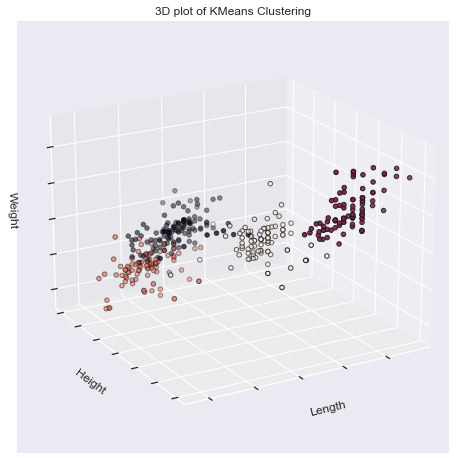

In [60]:
from mpl_toolkits.mplot3d import Axes3D

labels=best.labels_
X['group']=predictions
X['group'] = X['group'].astype('category')

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')


In [66]:
datapoint=np.array([18.50,5.90,104.25,77.00,2263.75,15.62])
datapoint=datapoint.reshape(1,-1)
label=best.predict(X=datapoint)
print(label)

[1]


# Part B

In [69]:
data=pd.read_csv('vehicle.csv')
missing=data.isna().mean().round(4) * 100
missing

compactness                    0.00
circularity                    0.59
distance_circularity           0.47
radius_ratio                   0.71
pr.axis_aspect_ratio           0.24
max.length_aspect_ratio        0.00
scatter_ratio                  0.12
elongatedness                  0.12
pr.axis_rectangularity         0.35
max.length_rectangularity      0.00
scaled_variance                0.35
scaled_variance.1              0.24
scaled_radius_of_gyration      0.24
scaled_radius_of_gyration.1    0.47
skewness_about                 0.71
skewness_about.1               0.12
skewness_about.2               0.12
hollows_ratio                  0.00
class                          0.00
dtype: float64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [73]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [74]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [86]:
data_new=data.copy()
data_new['circularity'].fillna(data['circularity'].mean(),inplace=True)
data_new['distance_circularity'].fillna(data['distance_circularity'].mean(),inplace=True)
data_new['radius_ratio'].fillna(data['radius_ratio'].mean(),inplace=True)
data_new['pr.axis_aspect_ratio'].fillna(data['pr.axis_aspect_ratio'].mean(),inplace=True)
data_new['scatter_ratio'].fillna(data['scatter_ratio'].median(),inplace=True)
data_new['elongatedness'].fillna(data['elongatedness'].mean(),inplace=True)
data_new['pr.axis_rectangularity'].fillna(data['pr.axis_rectangularity'].mean(),inplace=True)
data_new['scaled_variance'].fillna(data['scaled_variance'].mean(),inplace=True)
data_new['scaled_variance.1'].fillna(data['scaled_variance.1'].median(),inplace=True)
data_new['scaled_radius_of_gyration'].fillna(data['scaled_radius_of_gyration'].mean(),inplace=True)
data_new['scaled_radius_of_gyration.1'].fillna(data['scaled_radius_of_gyration.1'].mean(),inplace=True)
data_new['skewness_about'].fillna(data['skewness_about'].mean(),inplace=True)
data_new['skewness_about.1'].fillna(data['skewness_about.1'].mean(),inplace=True)
data_new['skewness_about.2'].fillna(data['skewness_about.2'].mean(),inplace=True)

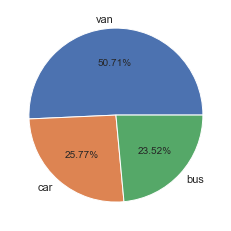

In [76]:
labelz=data['class'].unique()
plt.pie(x=data['class'].value_counts(),labels=labelz,radius=1,autopct='%0.2f%%');

In [87]:
duplicates_v=data_new[data_new.duplicated(keep='last')]
print(duplicates_v)

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


In [88]:
from sklearn.model_selection import train_test_split
x=data_new.drop(labels=['class'],axis=1)
y=data_new.pop('class')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=27)

In [89]:
X_train.apply(zscore)
X_test.apply(zscore)

compactness  circularity  distance_circularity  radius_ratio  \
220     0.679124     1.658633              1.199119      1.061570   
306     1.587167     0.580758              1.576619      0.945198   
104     1.068285     0.118812              0.066618      0.828826   
602     0.808845     1.042705              1.702452      1.788894   
434     1.327726     1.042705              1.450786     -0.043963   
..           ...          ...                   ...           ...   
673    -0.358639    -1.421010             -1.002967     -0.305799   
172     0.030522     0.118812             -0.059216     -0.102148   
402     0.938565     1.196687              1.450786     -0.218520   
72     -0.228918    -0.805081              0.569951      0.625175   
179    -0.618079    -0.035170             -0.751300     -0.945844   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
220              0.017812                 1.138037       1.659556   
306             -0.103312                 0.396787       1.200618   
104              0.381187                -0.838630       0.802872   
602              0.986810                 0.643870       1.598364   
434             -0.951186                 0.396787       1.231214   
..                    ...                      ...            ...   
673             -0.345562                -0.344463      -0.635134   
172              0.623436                 0.149703      -0.696326   
402             -1.072310                 0.396787       1.353597   
72               0.017812                -0.097380       0.252146   
179             -0.466687                -0.591547      -0.971689   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
220      -1.417552                1.772133                   2.155688   
306      -1.165080                1.379054                   0.416130   
104      -1.038845                0.592896                  -0.034867   
602      -1.417552                1.772133                   1.060410   
434      -1.165080                1.379054                   0.995982   
..             ...                     ...                        ...   
673       0.475983               -0.586341                  -1.001288   
172       0.602218               -0.586341                   0.029561   
402      -1.291316                1.379054                   1.060410   
72       -0.533902                0.199817                  -0.614720   
179       0.980925               -0.979420                  -0.034867   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
220         1.167479           1.685014                   1.187871   
306         1.230233           1.179976                   0.810254   
104         1.167479           0.837479                  -0.148313   
602         1.575381           1.685014                   0.984539   
434         1.010594           1.214806                   1.420251   
..               ...                ...                        ...   
673        -0.589636          -0.637000                  -1.426402   
172        -0.746521          -0.689245                   0.200257   
402         1.198856           1.377347                   0.926444   
72          0.257545           0.198925                  -0.613073   
179        -0.621013          -0.921447                  -0.177360   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
220                    -0.167938       -0.900909         -1.148489   
306                    -0.297182       -0.283955          1.709951   
104                     0.866016       -1.312212          1.595613   
602                     0.090550        0.949955          0.680912   
434                    -0.038694        0.538652          0.795250   
..                           ...             ...               ...   
673                    -1.072647       -1.106561         -1.377164   
172                    -0.814159        0.949955          0.109224   

In [90]:
from sklearn.svm import SVC
from sklearn import metrics

base_svm = SVC(gamma=0.01, C=5)
base_svm.fit(X_train, y_train)
pred = base_svm.predict(X_train)
clf_score_svm = base_svm.score(X_train, y_train)
print(clf_score_svm)

class_report_svm=metrics.classification_report(y_train,pred,target_names=('car','bus','van'))
print(class_report_svm)

1.0
              precision    recall  f1-score   support

         car       1.00      1.00      1.00       184
         bus       1.00      1.00      1.00       333
         van       1.00      1.00      1.00       159

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676



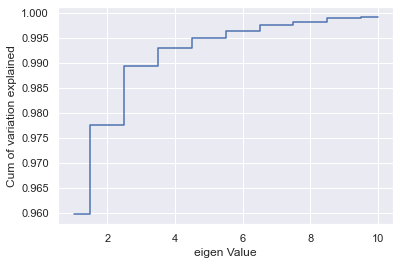

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)

plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

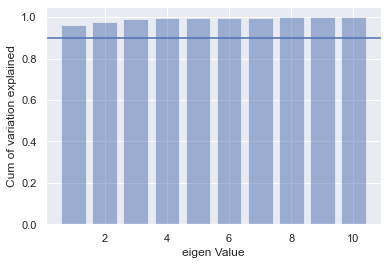

In [98]:
plt.bar(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_),alpha=0.5, align='center')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90)
plt.show()

In [96]:
pca2 = PCA(n_components=1)
pca2.fit(X_train)
xpca2=pca2.transform(X_train)


In [97]:
pca_svm = SVC(gamma=0.01, C=5)
pca_svm.fit(xpca2, y_train)
pred_pca = pca_svm.predict(xpca2)
clf_sc_svm = pca_svm.score(xpca2, y_train)
print(clf_sc_svm)

class_rep_svm=metrics.classification_report(y_train,pred_pca,target_names=('car','bus','van'))
print(class_rep_svm)

0.742603550295858
              precision    recall  f1-score   support

         car       0.72      0.71      0.71       184
         bus       0.84      0.74      0.79       333
         van       0.62      0.79      0.69       159

    accuracy                           0.74       676
   macro avg       0.73      0.74      0.73       676
weighted avg       0.76      0.74      0.75       676



There is a marked decrease in the accuracy score of the model after using only one principal component.

In [102]:
xpca=pca.transform(X_train)
pca3_svm = SVC(gamma=0.01, C=5)
pca3_svm.fit(xpca, y_train)
pred_pca3 = pca3_svm.predict(xpca)
clf_s_svm = pca3_svm.score(xpca, y_train)
print(clf_s_svm)

1.0


### Prerequisites of PCA
The correlations between the independent variables should only be linear

Data normalization is compulsory 

### Advantages of PCA
Removes the correlated attributes

Helps reduce overfitting

Improves the data visualization

Improves the performance of the algorithm

### Limitations of PCA
Results in loss of information

Independent variables become less interpretable